# Práctica 08: Análisis Estadístico Avanzado de Datos usando las librerias: Scipy, itertools y wordcloud

##### Creado por: Yulissa Ortega Cuevas Matricula: 220875

##### Asignatura: Extracción de Conocimiento de Bases de Datos

##### PE: Ingeniería en Desarrollo y Gestión de Software - 9B

In [2]:
# Carga de paquetes y Librerías a utilizar

# Básicos (Standard)

import numpy as np # Sirve para poder realizar procesamientos básicos númericos en datos cuantitativos
import pandas as pd # Sirve para realizar los procesos ETL es un conjunto de datos
import time # Sirve para la manipulación de datos en diferentes formatos de tiempo

#Gratificadores (Plats)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### 1. Importar el origen de los datos

In [3]:
!cd 
!dir

C:\Users\ti_la\Downloads\Practica 08
 El volumen de la unidad C es OS
 El número de serie del volumen es: 06DF-BDAA

 Directorio de C:\Users\ti_la\Downloads\Practica 08

26/06/2025  01:26 p. m.    <DIR>          .
26/06/2025  01:22 p. m.    <DIR>          ..
26/06/2025  01:24 p. m.    <DIR>          .ipynb_checkpoints
26/06/2025  01:26 p. m.            17,225 Práctica08.ipynb
10/06/2025  02:23 p. m.         4,127,529 salaries.csv
               2 archivos      4,144,754 bytes
               3 dirs  34,799,529,984 bytes libres


In [4]:
!dir

 El volumen de la unidad C es OS
 El número de serie del volumen es: 06DF-BDAA

 Directorio de C:\Users\ti_la\Downloads\Practica 08

26/06/2025  01:26 p. m.    <DIR>          .
26/06/2025  01:22 p. m.    <DIR>          ..
26/06/2025  01:24 p. m.    <DIR>          .ipynb_checkpoints
26/06/2025  01:26 p. m.            17,225 Práctica08.ipynb
10/06/2025  02:23 p. m.         4,127,529 salaries.csv
               2 archivos      4,144,754 bytes
               3 dirs  34,799,579,136 bytes libres


Importamos los datos en una nueva

In [5]:
df = pd.read_csv('salaries.csv')

Corroboramos el tipo de datos de nuestro objeto

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73154 entries, 0 to 73153
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73153 non-null  float64
 1   experience_level    73153 non-null  object 
 2   employment_type     73148 non-null  object 
 3   job_title           73149 non-null  object 
 4   salary              73150 non-null  float64
 5   salary_currency     73148 non-null  object 
 6   salary_in_usd       73150 non-null  float64
 7   employee_residence  73153 non-null  object 
 8   remote_ratio        73149 non-null  float64
 9   company_location    73154 non-null  object 
 10  company_size        73148 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB


### 5. Estadística avanzada

#### Step 1 | Library & Configurations

In [11]:
%%time

# Installing select libraries:-
from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages

import re # regular expressions

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats # statistical functions

from itertools import cycle, combinations  # Igenerating combinations & cycle

import matplotlib.pyplot as plt # data visualization
from matplotlib.ticker import FuncFormatter  # For custom formatting of ticks
from matplotlib.ticker import FormatStrFormatter  # For formatting ticks with a string
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D axes module
from matplotlib.colors import ListedColormap  # Importing colormap for scatter plot
import seaborn as sns # statistical data visualization
from wordcloud import WordCloud  # Importing WordCloud library for textual data visualization

from io import StringIO

filterwarnings('ignore'); # Ignore warning messages
from IPython.display import display, HTML, display_html, clear_output; # displaying HTML content


clear_output();
print();
collect();


CPU times: total: 62.5 ms
Wall time: 88.1 ms


In [13]:
# Set the plot style to 'fivethirtyeight'
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(10, 10)})
print(f"Succesfully Configured libraries!")

Succesfully Configured libraries!


#### Step 2 | Load Dataset

In [54]:
%%time

# Error Handling When Loading Dataset with Pandas read_csv

try:
    # Attempt to read the dataset
    df = pd.read_csv('salaries.csv')
    print(f"Dataset loaded successfully.")
    
except FileNotFoundError:
    # Handle FileNotFoundError if the file does not exist
    print(f"Error: File not found. Please check the file path.")

except Exception as e:
    # Handle other exceptions
    print(f"An error occurred while loading the dataset: {e}")

print()
collect();

Dataset loaded successfully.

CPU times: total: 93.8 ms
Wall time: 180 ms


#### Step 3 | Attribute Overview

In [55]:
def display_dataframe_with_custom_header(df, show_head=False):
    print(f"{'DataFrame Info:':-^50}")
    print(df.info())
    print()
    
    print(f"{'DataFrame Shape:':-^50}")
    print(df.shape)
    print()
    
    print(f"{'DataFrame Columns:':-^50}")
    print(df.columns.tolist())
    print()
    
    if show_head:
        print(f"{'DataFrame Head:':-^50}")
        display(df.head())

In [56]:
display_dataframe_with_custom_header(df)  # Display info
display_dataframe_with_custom_header(df, show_head=True)  # Display head

-----------------DataFrame Info:------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73154 entries, 0 to 73153
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73153 non-null  float64
 1   experience_level    73153 non-null  object 
 2   employment_type     73148 non-null  object 
 3   job_title           73149 non-null  object 
 4   salary              73150 non-null  float64
 5   salary_currency     73148 non-null  object 
 6   salary_in_usd       73150 non-null  float64
 7   employee_residence  73153 non-null  object 
 8   remote_ratio        73149 non-null  float64
 9   company_location    73154 non-null  object 
 10  company_size        73148 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB
None

-----------------DataFrame Shape:-----------------
(73154, 11)

----------------DataFrame Columns:----------------
['work_year', 'experience_leve

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,170000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M


#### Step 4 | Missing Value Handling

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_missing_values_heatmap(df):
    null_counts = df.isnull().sum()
    total = len(df)
    
    # Si no hay valores nulos, seguimos mostrando la gráfica con barras "vacías"
    plt.figure(figsize=(12, 6))
    bar_colors = sns.color_palette("copper", len(null_counts))
    sns.barplot(x=null_counts.index, y=null_counts.values, palette=bar_colors)

    plt.title("Count of Missing Values", fontsize=14, color="orangered")

    for i, value in enumerate(null_counts.values):
        plt.text(i, value + 0.05, str(value), ha='center', va='bottom', 
                 color='white', fontweight='bold')

    plt.xticks(rotation=45, ha='right')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

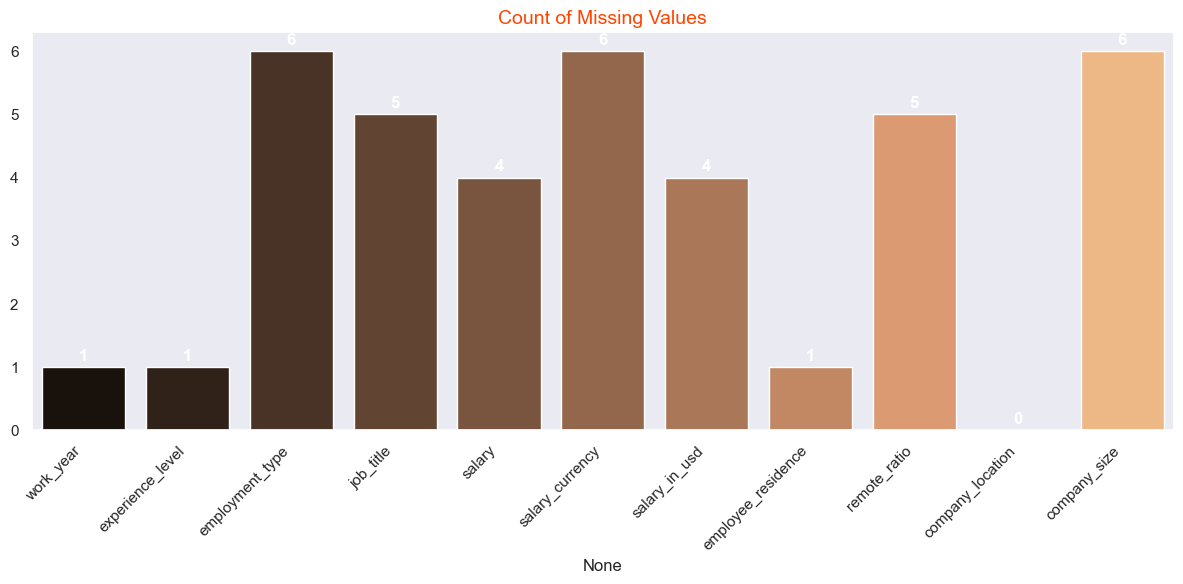

In [66]:
# Call the function to plot the heatmap
plot_missing_values_heatmap(df)

#### Step 5 | Duplicate Value Manage

In [59]:
# Checking the duplicate values in the data
duplicate_values = df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

The data contains 39125 duplicate values


In [60]:
def apply_duplicated_styling(df):
    duplicated_cols = df.T.duplicated()
    return pd.DataFrame(duplicated_cols, index=df.columns).style.applymap(
        lambda v: 'color: blue; font-weight: bold' if v else 'color: green'
    )

In [61]:
# checks for duplicates among the columns of the DataFrame.
styled_df = apply_duplicated_styling(df)
styled_df

,0
work_year,False
experience_level,False
employment_type,False
job_title,False
salary,False
salary_currency,False
salary_in_usd,False
employee_residence,False
remote_ratio,False
company_location,False


#### Step 6 | Statistical Data Summary

##### Calcular las medidas de tendencia central de nuestro dataframe

In [63]:
def calculate_statistics(df, opacity=0.5, font_size='14px'):
    import scipy.stats as stats
    from IPython.display import HTML

    # Solo incluir columnas numéricas
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    stats_dict = {
        'Mean': numeric_df.mean(),
        'Median': numeric_df.median(),
        'Mode': numeric_df.mode().iloc[0],
        'Range': numeric_df.max() - numeric_df.min(),
        'Stdev': numeric_df.std(),
        'Variance': numeric_df.var(),
        'IQR': numeric_df.quantile(0.75) - numeric_df.quantile(0.25),
        '25%': numeric_df.quantile(0.25),
        '50%': numeric_df.quantile(0.5),
        '75%': numeric_df.quantile(0.75),
        'Min': numeric_df.min(),
        'Max': numeric_df.max(),
        'Skewness': numeric_df.skew(),
        'Kurtosis': numeric_df.kurtosis()
    }

    stats_df = pd.DataFrame(stats_dict).T

    styled_df = stats_df.style.set_table_attributes(
        f"style='display:inline;border-collapse:collapse;background-color:rgba(0,150,255,{opacity});font-size:{font_size};'"
    ).format("{:,.2f}")

    return styled_df


In [64]:
stats_df = calcular_estadisticas(df)
stats_df

,work_year,salary,salary_in_usd,remote_ratio
Mean,2023.830000,162835.530000,158011.200000,21.580000
Median,2024.000000,148000.000000,147500.000000,0.000000
Mode,2024.000000,160000.000000,160000.000000,0.000000
Range,5.000000,30386000.000000,785000.000000,100.000000
Stdev,0.480000,197488.540000,72501.930000,41.020000
Variance,0.230000,39001722204.389999,5256529815.310000,1682.880000
IQR,0.000000,93040.000000,92810.000000,0.000000
25%,2024.000000,106960.000000,106890.000000,0.000000
50%,2024.000000,148000.000000,147500.000000,0.000000
75%,2024.000000,200000.000000,199700.000000,0.000000


In [68]:
def variable_summary(df):
    summary = pd.DataFrame({
        'Variable': df.columns,
        'Dtype': df.dtypes.values,
        'Count': df.count().values,
        'Unique': df.nunique().values,
        'Missing': df.isnull().sum().values
    })
    return summary

In [69]:
# DataFrame called 'df'
summary_df = variable_summary(df)
summary_df

,Variable,Dtype,Count,Unique,Missing
0,work_year,float64,73153,6,1
1,experience_level,object,73153,5,1
2,employment_type,object,73148,4,6
3,job_title,object,73149,289,5
4,salary,float64,73150,7095,4
5,salary_currency,object,73148,25,6
6,salary_in_usd,float64,73150,7703,4
7,employee_residence,object,73153,93,1
8,remote_ratio,float64,73149,4,5
9,company_location,object,73154,86,0
